# Create connection matrix for small striatal network

This notebook shows how to setup a small network of dSPN, iSPN and FS, and then export the connection matrix.

Note that it uses the BasalGangliaData private repository, but it can be run with the data in ```Snudda/snudda/data``` (but the connectivity might differ slightly.

In [7]:
import os 

network_path = "zirui_striatum"
n_dspn = 200
n_ispn = 200
n_fs = 20

snudda_data = "/home/hjorth/HBP/BasalGangliaData/data"

if not os.path.isdir(snudda_data):
    print("Using the old morphologies in Snudda/snudda/data")
    snudda_data = None

In [10]:
import snudda.init

print("Starting SnuddaInit")
si = snudda.init.SnuddaInit(network_path=network_path, snudda_data=snudda_data, random_seed=12345, honor_stay_inside=False)
si.define_striatum(num_dSPN=n_dspn, num_iSPN=n_ispn, num_FS=n_fs, num_LTS=0, num_ChIN=0,
                   volume_type="cube")
si.write_json()

Starting SnuddaInit
Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
ChIN: Skipping neuron because, num_neurons =0
LTS: Skipping neuron because, num_neurons =0
No directory $SNUDDA_DATA/neurons/striatum/ngf, skipping NGF cells.
Writing zirui_striatum/network-config.json


In [11]:
from snudda import Snudda

snd = Snudda(network_path)
snd.create_network()

Placing neurons
Network path: zirui_striatum
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from zirui_striatum/network-config.json
Generating 2495 points for zirui_striatum/mesh/Striatum-cube-mesh-0.0001734407475316721.obj
n_points = 2373, previous close_pairs = 4687
n_points = 2257, previous close_pairs = 3842
n_points = 2148, previous close_pairs = 3179
n_points = 2045, previous close_pairs = 2653
n_points = 1947, previous close_pairs = 2228
n_points = 1855, previous close_pairs = 1864
n_points = 1769, previous close_pairs = 1573
n_points = 1690, previous close_pairs = 1327
n_points = 1617, previous close_pairs = 1112
n_points = 1550, previous close_pairs = 920
n_points = 1489, previous close_pairs = 791
n_points = 1434, previous close_pairs = 677
n_points = 1385, previous close_pairs = 570
n_points = 1342, previous close_pairs = 475
n_points = 1304, previous close_pairs = 398
n_points = 974, previous close_pairs = 330
Filtering 974 points..
Filtering, keeping inside poi

In [12]:
from snudda.utils.export_connection_matrix import SnuddaExportConnectionMatrix
sec = SnuddaExportConnectionMatrix(in_file=os.path.join(network_path, "network-synapses.hdf5"),
                                   out_file="striatum-connectivity")

Writing striatum-connectivity (row = src, column=dest)
Saving 90080 synapses, over 25916 coupled pairs.
Writing striatum-connectivity-meta


In [13]:
from snudda.analyse.analyse_striatum import SnuddaAnalyseStriatum
sas = SnuddaAnalyseStriatum(network_path)

Loading zirui_striatum/network-synapses.hdf5
Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Creating figures directory zirui_striatum/figures
Number of neurons: 420
Synapse row 0 - 0.0 % time: 0.006772475999241578 seconds
Created connection matrix 0.10632941999938339 seconds
GJ row : 0 - 0.0 %  time : 0.0012377040002320427 seconds
Created gap junction connection matrix 0.0015776199998072116 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
n_synapses = 90080, at 0
Created distance histogram (optimised) in 0.10725524999907066 seconds
Saving cache to zirui_striatum/network-synapses.hdf5-cache


Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 200/200
Counting connections
Requested: 10000000.0 calculated [24858.]
Rejected (too large z-depth): 15142
Updating connection probability data stored in zirui_striatum/connection_data.json
Creating zirui_striatum/connection_data.json
P(d<5e-05) = 0.05449800429843414
P(d<0.0001) = 0.04664936823104693


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


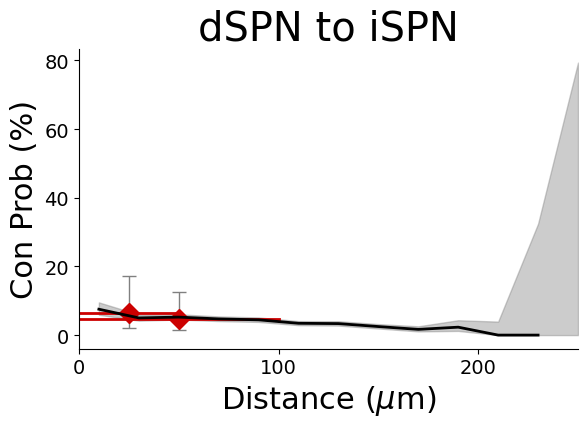

Wrote zirui_striatum/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.png
Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 200/200
Counting connections
Requested: 10000000.0 calculated [24920.]
Rejected (too large z-depth): 14880
Updating connection probability data stored in zirui_striatum/connection_data.json
Appending connection data to zirui_striatum/connection_data.json
P(d<5e-05) = 0.26630607699650016
P(d<0.0001) = 0.21204874160118437


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


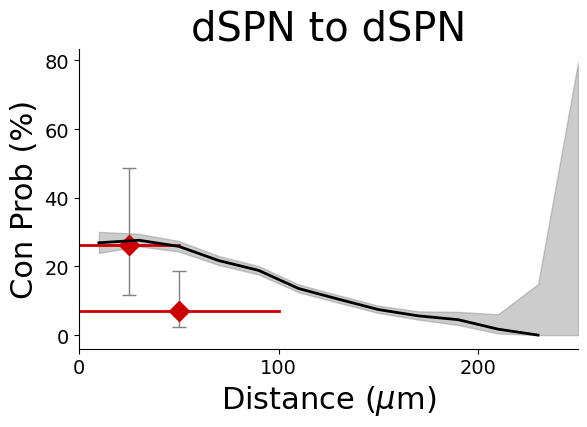

Wrote zirui_striatum/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.png
Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 200/200
Counting connections
Requested: 10000000.0 calculated [24858.]
Rejected (too large z-depth): 15142
Updating connection probability data stored in zirui_striatum/connection_data.json
Appending connection data to zirui_striatum/connection_data.json
P(d<5e-05) = 0.28983727356463
P(d<0.0001) = 0.2226985559566787


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


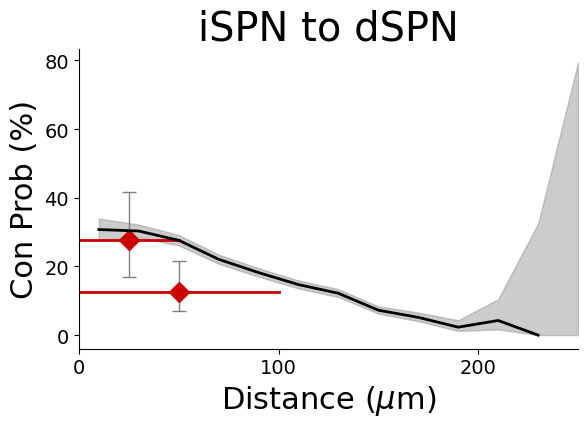

Wrote zirui_striatum/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.png
Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 200/200
Counting connections
Requested: 10000000.0 calculated [25162.]
Rejected (too large z-depth): 14638
Updating connection probability data stored in zirui_striatum/connection_data.json
Appending connection data to zirui_striatum/connection_data.json
P(d<5e-05) = 0.35443980929678187
P(d<0.0001) = 0.3035850081477458


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


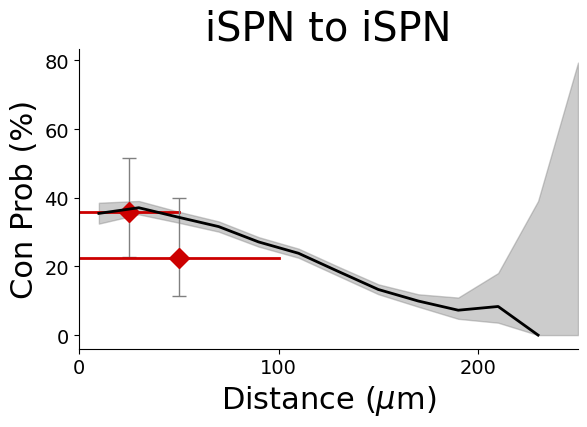

Wrote zirui_striatum/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-2D-dist.png
Plotting connection probability FS to FS (synapses)
Centering in None : Keeping 20/20
Counting connections
Requested: 10000000.0 calculated [238.]
Rejected (too large z-depth): 142
Updating connection probability data stored in zirui_striatum/connection_data.json
Appending connection data to zirui_striatum/connection_data.json
P(d<0.00025) = 0.25630252100840334


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


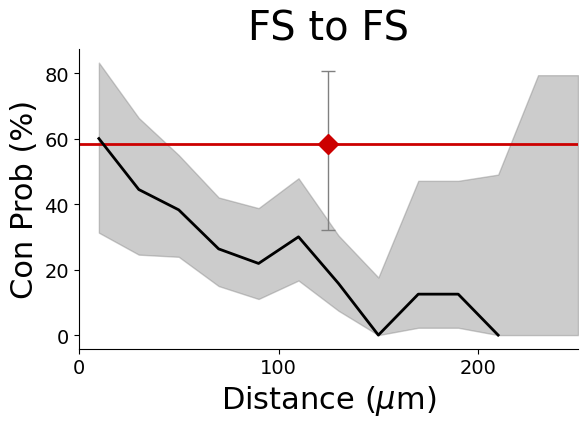

Wrote zirui_striatum/figures/Network-distance-dependent-connection-probability-FS-to-FS-synapses-2D-dist.png
Plotting connection probability FS to FS (gapjunctions)
Centering in None : Keeping 20/20
Counting connections
Requested: 10000000.0 calculated [238.]
Rejected (too large z-depth): 142
Updating connection probability data stored in zirui_striatum/connection_data.json
Appending connection data to zirui_striatum/connection_data.json
P(d<0.0002) = 0.07142857142857142
P(d<0.00025) = 0.07142857142857142
P(d<0.00025) = 0.07142857142857142


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1438: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


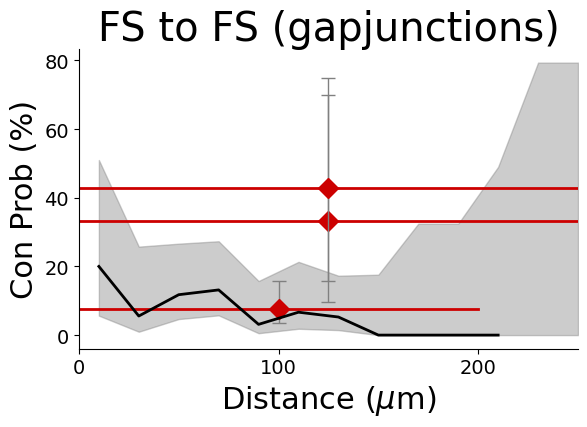

Wrote zirui_striatum/figures/Network-distance-dependent-connection-probability-FS-to-FS-gapjunctions-2D-dist.png


({0.0002: 0.07142857142857142, 0.00025: 0.07142857142857142},
 'zirui_striatum/figures/Network-distance-dependent-connection-probability-FS-to-FS-gapjunctions-2D-dist.png')

In [16]:
dist3D = False
dump_connection_data_to_file = os.path.join(network_path, "connection_data.json")
y_max_H = None

sas.plot_connection_probability("dSPN", "iSPN",
                                dist_3d=dist3D,
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data=[3 / 47.0, 3 / 66.0],
                                exp_data_detailed=[(3, 47), (3, 66)],
                                y_max=y_max_H,
                                dump_data_to_file=dump_connection_data_to_file)
sas.plot_connection_probability("dSPN", "dSPN",
                                dist_3d=dist3D,
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data=[5 / 19.0, 3 / 43.0],
                                exp_data_detailed=[(5, 19), (3, 43)],
                                y_max=y_max_H,
                                dump_data_to_file=dump_connection_data_to_file)
sas.plot_connection_probability("iSPN", "dSPN",
                                dist_3d=dist3D,
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data=[13 / 47.0, 10 / 80.0],
                                exp_data_detailed=[(13, 47), (10, 80)],
                                y_max=y_max_H,
                                dump_data_to_file=dump_connection_data_to_file)
sas.plot_connection_probability("iSPN", "iSPN",
                                dist_3d=dist3D,
                                exp_max_dist=[50e-6, 100e-6],
                                exp_data=[14 / 39.0, 7 / 31.0],
                                exp_data_detailed=[(14, 39), (7, 31)],
                                y_max=y_max_H,
                                dump_data_to_file=dump_connection_data_to_file)
sas.plot_connection_probability("FS", "FS",
                                dist_3d=dist3D,
                                exp_max_dist=[250e-6],
                                exp_data=[7 / 12.0],
                                exp_data_detailed=[(7, 12)],
                                dump_data_to_file=dump_connection_data_to_file)
sas.plot_connection_probability("FS", "FS",
                                dist_3d=dist3D,
                                connection_type="gapjunctions",
                                exp_max_dist=[200e-6, 250e-6, 250e-6],
                                exp_data=[6/78.0, 2 / 6.0, 3 / 7.0],
                                exp_data_detailed=[(6, 78), (2, 6), (3, 7)],
                                dump_data_to_file=dump_connection_data_to_file)